In [58]:
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt

In [78]:
#load the data
df = pd.read_csv('./bankstatements.csv')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     509 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB


In [ ]:
# 
df.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,UNKNOWN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,UNKNOWN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


In [74]:
df.describe()

,amount,balance,Day,Month,Year,Tday
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,8736.453006,115873.671493,13.569745,6.163065,2022.489194,161.850688
std,27181.105774,136850.421744,9.168241,3.282459,0.500375,92.683683
min,1.000000,0.130000,1.000000,1.000000,2022.000000,1.000000
25%,400.000000,35345.130000,5.000000,3.000000,2022.000000,83.000000
50%,1120.000000,56645.670000,12.000000,6.000000,2022.000000,165.000000
75%,7000.000000,121341.470000,22.000000,9.000000,2023.000000,243.000000
max,360000.000000,473292.870000,31.000000,12.000000,2023.000000,313.000000


In [75]:
df.iloc[0:5, 0:5]

,date,DrCr,amount,balance,mode
0,2022-01-01,Db,10000.0,473292.87,ATM
1,2022-01-01,Db,10000.0,463292.87,ATM
2,2022-01-02,Db,930.0,462362.87,UPI
3,2022-01-07,Db,2000.0,460362.87,UPI
4,2022-01-10,Db,1000.0,459362.87,UPI


In [79]:
# Check for missing values
df.isnull().sum()

date         0
DrCr         0
amount       0
balance      0
mode         0
name       139
Day          0
Month        0
Year         0
Tday         0
dtype: int64

In [80]:
# fill missing names with "UNKNOWN"
df['name'].fillna('UNKNOWN', inplace=True)

C:\Users\Work\AppData\Local\Temp\ipykernel_27652\3421796518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('UNKNOWN', inplace=True)


In [ ]:
# Check for missing values again
df.isnull().sum()

date       0
DrCr       0
amount     0
balance    0
mode       0
name       0
Day        0
Month      0
Year       0
Tday       0
dtype: int64

In [86]:
# Convert 'amount' column to float
df['amount'] = df['amount'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     509 non-null    object 
 1   DrCr     509 non-null    object 
 2   amount   509 non-null    float64
 3   balance  509 non-null    float64
 4   mode     509 non-null    object 
 5   name     509 non-null    object 
 6   Day      509 non-null    int64  
 7   Month    509 non-null    int64  
 8   Year     509 non-null    int64  
 9   Tday     509 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 39.9+ KB


In [87]:
df.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,UNKNOWN,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,UNKNOWN,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,AYUBRAJE,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,ABUTALAH,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,AGRAWALB,10,1,2022,4


In [88]:
# standardizing the text in the 'name' column
df['name'] = df['name'].str.lower()

In [89]:
df.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,ATM,unknown,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,ATM,unknown,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,UPI,ayubraje,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,UPI,abutalah,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,UPI,agrawalb,10,1,2022,4


In [90]:
# standardizing the text in the mode column
df['mode'] = df['mode'].str.lower()

In [91]:
df.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,Db,10000.0,473292.87,atm,unknown,1,1,2022,1
1,2022-01-01,Db,10000.0,463292.87,atm,unknown,1,1,2022,1
2,2022-01-02,Db,930.0,462362.87,upi,ayubraje,2,1,2022,2
3,2022-01-07,Db,2000.0,460362.87,upi,abutalah,7,1,2022,3
4,2022-01-10,Db,1000.0,459362.87,upi,agrawalb,10,1,2022,4


In [92]:
# standardizing the text in the DrCr column
df['DrCr'] = df['DrCr'].str.lower()

In [93]:
df.head()

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
0,2022-01-01,db,10000.0,473292.87,atm,unknown,1,1,2022,1
1,2022-01-01,db,10000.0,463292.87,atm,unknown,1,1,2022,1
2,2022-01-02,db,930.0,462362.87,upi,ayubraje,2,1,2022,2
3,2022-01-07,db,2000.0,460362.87,upi,abutalah,7,1,2022,3
4,2022-01-10,db,1000.0,459362.87,upi,agrawalb,10,1,2022,4


In [115]:
df.sample(5)

,date,DrCr,amount,balance,mode,name,Day,Month,Year,Tday
243,2022-12-13,db,2999.0,89827.95,upi,huchchapp,13,12,2022,160
83,2022-05-04,cr,11500.0,112329.96,upi,nafeesab,4,5,2022,55
314,2023-02-28,cr,28386.0,28386.13,neft,unknown,28,2,2023,199
30,2022-02-11,db,2000.0,459487.96,upi,abutalah,11,2,2022,16
231,2022-12-01,cr,41299.0,111638.75,neft,unknown,1,12,2022,154


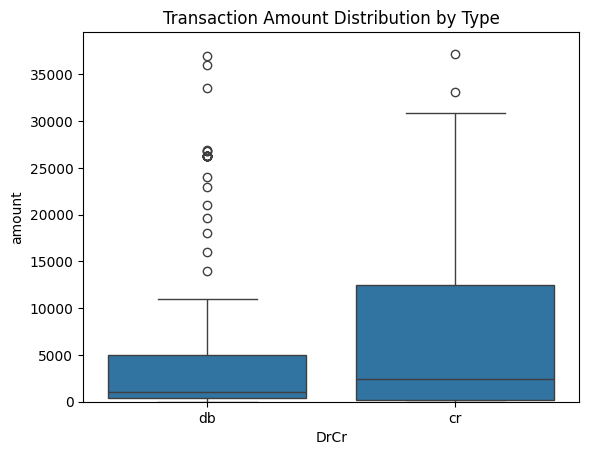

In [ ]:
# Visualizing the distribution of transaction amounts by type

import seaborn as sns; 
sns.boxplot(data=df, x='DrCr', y='amount')
plt.title('Transaction Amount Distribution by Type')
plt.ylim(0, df['amount'].quantile(0.95)) 
plt.show()


In [124]:
# Get frequency of unique 'name' values
name_counts = df['name'].value_counts()
print(name_counts.head(10))  # Top 10 for quick view

name
unknown      139
abutalah      80
phonepe       35
nafeesab      33
sangalli      19
hdfcbank      18
flipkart      16
dadakhala     14
ayubraje      13
budesaheb     12
Name: count, dtype: int64


In [ ]:
# # function for categorizing by name
# def categorize_by_name(name):
#     if 'abutalah' in name:
#         return 'Personal'
#     elif 'phonepe' in name or 'nafeesab' in name:
#         return 'Wives'
#     elif 'sangalli' in name or 'hdfcbank' in name:
#         return 'Parents'
#     elif 'flipkart' in name or 'dadakhala' in name:
#         return 'Boyfriends'
#     elif 'ayubraje' in name or 'budesaheb' in name:
#         return 'Children'
#     else:
#         return 'Other'
    
# # Apply categorization
# df['category'] = df['name'].apply(categorize_by_name)

# # check the distribution of categories
# category_counts = df['category'].value_counts()
# print(category_counts)

import numpy as np
# Function to categorize transactions by names using numpy

conditons = [
    df['name'].str.contains('abutalah', case=False, na=False),
    df['name'].str.contains('phonepe|nafeesab', case=False, na=False),
    df['name'].str.contains('sangalli|hdfcbank', case=False, na=False),
    df['name'].str.contains('flipkart|dadakhala', case=False, na=False),
    df['name'].str.contains('ayubraje|budesaheb', case=False, na=False)
]

choices = np.array(['Personal', 'Wives', 'Parents', 'Boyfriends', 'Children', 'Other'])

# Apply categorization using numpy
df['category'] = np.select(conditons, choices[:-1], default=choices[-1])

# check the distribution of categories
category_counts = df['category'].value_counts()
print(category_counts)

category
Other         269
Personal       80
Wives          68
Parents        37
Boyfriends     30
Children       25
Name: count, dtype: int64
